---
# 💼 Attrition in an Organization || Why Workers Quit?

---

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

> 1. Expensive in terms of both money and time to train new employees.
> 1. Loss of experienced employees
> 1. Impact in productivity
> 1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

------
## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?


### <b>Business Goal</b>
In the age of the Great Resignation, employee retention strategies have become a critical area of focus for many organizations. There are often a variety of reasons why employees leave an organization that vary from industry to industry. In this case study, I will examine some of the commonalities between former employees and identify key drivers of attrition to assist the HR Department strengthen their retention strategies and proactively reduce their attrition rates.  

### <b>Data Overview</b>
In this notebook, I will analyze IBM's on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

---
# 📊 Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two categorical variables
        > - Categorical & Continous : Boxplots charts
- Detect outliers

In [ ]:
df.columns

# First look

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

In [ ]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() <= 10:
        print(f"{column} : {df[column].unique()}")
        print("====================================")

In [ ]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 10:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        print("====================================")

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [ ]:
df[numeric_columns].describe()

In [ ]:
df[categorical_columns].describe()

In [ ]:
df['Attrition'].value_counts()
#df['Attrition'].value_counts(normalize=True)*100

Overall, around 16% of employees left the company.

In [ ]:
plot_df2=df[df.Attrition=='Yes']
plot_df2['Department'].value_counts(normalize=True)

Among former employees, over half worked in Research & Development, while only 5% were from Human Resources. 

In [ ]:
df.groupby(['Gender','Department'])['Attrition'].value_counts()
#df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)

In [ ]:
df.groupby(['Gender','Department'])['Department'].value_counts()

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest proportion of turnover occurred in the Sales department.

In [ ]:
df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)*100

Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance. 

In [ ]:
df.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)

In [ ]:
df.groupby(['Attrition','Gender'])['JobSatisfaction'].value_counts(normalize=True)

In [ ]:
df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()

In [ ]:
df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()


In [ ]:
df.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

In [ ]:
df['JobLevel']=pd.Categorical(df['JobLevel']).rename_categories(  ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

In [ ]:
df['JobLevel']

Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

---
## 📉 Data Visualisation

In [ ]:
df.columns

In [ ]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction','JobLevel',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']


for col in columns:
    plot_histogram(df, col)

In [ ]:
def plot_histogram(df,col,bycol):
    sns.displot(df, x=col)
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction','JobLevel',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']


for col in columns:
    plot_histogram(df, col, "Attrition")

In [ ]:
def plot_histogram(df,col,bycol):
    sns.displot(df, x=col, hue="Attrition",kind="kde")
    plt.show()

columns=['Education','TrainingTimesLastYear','StockOptionLevel','PercentSalaryHike','NumCompaniesWorked','JobSatisfaction','JobLevel',
'JobInvolvement','EnvironmentSatisfaction','RelationshipSatisfaction','DistanceFromHome','Age','MonthlyIncome','YearsAtCompany','TotalWorkingYears']

for col in columns:
    plot_histogram(df, col, "Attrition")

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## 📝 **Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

Confirming our findings in the scatterplot above, `MonthlyIncome` has a strong positive correlation to `TotalWorkingYears` of 0.77. Additionally, `YearsAtCompany` has a strong positive association with `YearsWithCurrManager` (correlation = 0.77), as well as with `YearsInCurrentRole` (correlation = 0.76). There are no variables with a correlation above 0.8, indicating a potential collinearity issue.

In [ ]:
df.skew().sort_values(ascending=False)

In [ ]:
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], palette="rocket")
    plt.show()


* ``Over18`` only have one Value (No Wonder :) )
* `Attrition` is heavily unbalanced
* Most of the employees travel rarely
* Most of the employees work overtimes
* There are more females than males

* There are employees which work for over 10 years without a promotion which is quite strange
* The performance rating of the employees isn't the best with ~ 3.0 as a median

# Bivariate plots

There are some obvious correlations among the numerical columns:

* High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
* High correlation between JobLevel and MonthlyIncome
* High correlation between TotalWorkingYears and YearsSinceLastPromotion -> The longer you are working, the higher is the probability that you reached your "limit" in terms of promotion

* Nearly half of the Sales Representatives went from the company away
* Most of the people were traveling rarely and Sales is the department with the highest attrition (but also with the most employees overall)

In [ ]:
df.groupby("Gender")["YearsSinceLastPromotion"].mean()

In [ ]:
df.groupby("Gender")["PerformanceRating"].mean()

Females are waiting a bit longer for a promotion than men, although having a better performance rating

# Data Preprocessing

---
# 🔨 Data Processing

## Drop unnecessary columns

Those columns have only one value

In [ ]:
X = df.loc[:, df.columns != "Attrition"].copy()
#X=df.loc[:, df.columns != 'Attrition']
y = df.loc[:, "Attrition"].copy()

## Label Encoding for Target `Attrition`

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, index=df.index, columns=["Attrition"])

In [ ]:
y

In [ ]:
#y=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
categorical_cols_features = list(X.select_dtypes(include="object").columns)

In [ ]:
categorical_cols_features

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [ ]:

X=pd.get_dummies(X, drop_first=True)
#X.columns=X.columns.str.replace(' ', '')
X.head()


## <b><span style='color:#68A19B'>II.</span> Create Training and Test Sets</b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
print("Train Shape:", X_train.shape, y_train.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

# 🤖 Applying machine learning algorithms

## ✔️ Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\Emy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [248]:
y_pred_label=label_encoder.inverse_transform(y_pred)
y_pred_label

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [249]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[309,   0],
       [ 58,   1]], dtype=int64)

<AxesSubplot:>

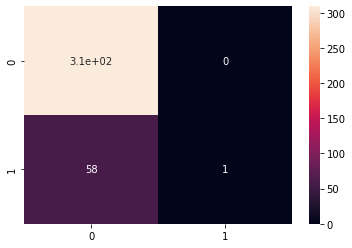

In [250]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True)


In [251]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.24%


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       1.00      0.02      0.03        59

    accuracy                           0.84       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.84      0.77       368

